In [1]:
import scipy
import numpy as np
import pandas as pd

In [2]:
data = scipy.io.loadmat("cams_info.mat")
# print(data.keys())
# print(data['cams_info'])

data_vec = data['cams_info'][0][0][0][0]

In [3]:
print(data_vec[0].shape)
print(data_vec[1].shape)
print(data_vec[2].shape)
print(data_vec[3].shape)




(272, 512, 3)
(272, 512)
(272, 512)
(1, 1)


In [4]:
# print(data_vec[0][0][0][0])

In [5]:
data_maps = scipy.io.loadmat("kp_gmaps.mat")

In [6]:
print(data_maps.keys())

dict_keys(['__header__', '__version__', '__globals__', 'kp_gmaps'])


In [7]:
data_maps_vec = data_maps['kp_gmaps']
print(data_maps_vec.shape)

(8, 4)


In [8]:
print(data_maps_vec.shape)
print(data_maps_vec)

(8, 4)
[[  12.875  284.875  318.375 1300.125]
 [ 559.375  277.625  561.625 1301.125]
 [ 492.625  218.625  588.625  974.125]
 [ 541.625  283.625  550.125 1316.625]
 [ 162.125  210.625  380.375  808.375]
 [  45.625  281.375  331.625 1283.125]
 [  20.125  281.375  320.375 1282.375]
 [ 134.375  212.125  358.625  818.625]]


In [9]:
### yolo maps


data_yolo = scipy.io.loadmat("yolo/yolo_0001.mat")

print(data_yolo.keys())

dict_keys(['__header__', '__version__', '__globals__', 'class', 'id', 'xyxy'])


In [10]:
data_yolo_id = data_yolo['id']
data_yolo_xyxy = data_yolo['xyxy']

print(data_yolo_id.shape)
print(data_yolo_xyxy.shape)

(5, 1)
(5, 4)


In [11]:
print(data_yolo_id[0])
print(data_yolo_xyxy[0])

print(data_yolo_id[1])
print(data_yolo_xyxy[1])

[1.]
[152.01659 228.8963  180.15756 206.96994]
[2.]
[430.35925 237.89246 457.54767 213.78455]


In [12]:
## check the elements of a dir
import os

directory_path = "yolo"

elements = os.listdir(directory_path)
elements = sorted(elements)

len_elements = len(elements)



In [24]:

def load_yolo(directory_path):

    elements = os.listdir(directory_path)
    elements = sorted(elements)

    len_elements = len(elements)


    tensor_yolo_id = []
    tensor_yolo_xyxy = []

    for i, element in enumerate(elements):
        data_yolo = scipy.io.loadmat(f"{directory_path}/{element}")
        
        data_yolo_id = data_yolo['id']
        data_yolo_xyxy = data_yolo['xyxy']
        
        tensor_yolo_xyxy.append(data_yolo_xyxy)
        tensor_yolo_id.append(data_yolo_id)


    np.unique(tensor_yolo_id[0])

    unique_ids = np.unique(tensor_yolo_id[0])

    for i in range(1, len(tensor_yolo_id)):
        unique_ids = np.union1d(unique_ids, np.unique(tensor_yolo_id[i]))

    ### determine the coordinates for each id

    track_coordinates = {id: [] for id in unique_ids}

    for i in range(len(tensor_yolo_id)):
        for j in range(len(tensor_yolo_id[i])):
            id = tensor_yolo_id[i][j][0]
            coordinates = tensor_yolo_xyxy[i][j]
            
            x_mean = (coordinates[0] + coordinates[2]) / 2.0
            y_mean = (coordinates[1] + coordinates[3]) / 2.0
            
            coords_mean = np.array([x_mean, y_mean, i])
            
            track_coordinates[id].append(coords_mean)


    for key in track_coordinates.keys():
        track_coordinates[key] = np.array(track_coordinates[key])

    ### key - id
    ### value - coordinates, nb_frame
    
    return track_coordinates


In [25]:
directory_path = "yolo"

track_coordinates = load_yolo(directory_path)

print(track_coordinates.keys())

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0])


In [27]:
print(track_coordinates[1])

[[166.08706665 217.93312073   0.        ]
 [168.83462524 216.39398193   1.        ]
 [171.17288208 213.74465942   2.        ]
 [174.32946777 211.73657227   3.        ]
 [177.77001953 209.65258789   4.        ]
 [180.14007568 207.57363892   5.        ]
 [182.88317871 204.97290039   6.        ]
 [185.47732544 203.07067871   7.        ]
 [187.69894409 200.85444641   8.        ]
 [190.00186157 198.98167419   9.        ]
 [192.20233154 197.39048767  10.        ]
 [194.21710205 196.14041138  11.        ]
 [196.75384521 194.33883667  12.        ]
 [198.43145752 192.60066223  13.        ]
 [199.98713684 191.20004272  14.        ]
 [201.90640259 189.64836121  15.        ]
 [203.50404358 188.47387695  16.        ]
 [205.17120361 187.56356812  17.        ]
 [206.33877563 186.08171082  18.        ]
 [207.81214905 184.77157593  19.        ]
 [209.59710693 183.27529907  20.        ]
 [211.13049316 181.8520813   21.        ]
 [212.55831909 181.31820679  22.        ]
 [213.74755859 180.28262329  23.  

In [41]:
## convert coordinates to image type

def coordinates2image(track_coordinates, width, height):

    track_coordinates_int = track_coordinates.astype(int)

    image = np.ones((height, width, 3), dtype=np.uint8)

    for i in range(len(track_coordinates_int)):
        x = track_coordinates_int[i][0]
        y = track_coordinates_int[i][1]
        image[y, x] = 255

    return image

## image positions
width = 400
height = 300

track_image = coordinates2image(track_coordinates[1], width, height)
print(track_image.shape)
print(track_image)






(300, 400, 3)
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [38]:
## image airport mao
import imageio.v2 as imageio

img = imageio.imread("airport_CapeTown_aerial.png")
img = np.array(img)

In [39]:
print(img.shape)
print(img)

(1347, 938, 4)
[[[191 185 187 255]
  [212 210 210 255]
  [234 232 233 255]
  ...
  [ 62 110  98 255]
  [ 62 110  98 255]
  [ 61 109  97 255]]

 [[196 192 193 255]
  [216 213 214 255]
  [235 235 235 255]
  ...
  [ 63 109  98 255]
  [ 62 110  98 255]
  [ 61 109  97 255]]

 [[203 197 199 255]
  [220 217 218 255]
  [238 236 237 255]
  ...
  [ 63 109  98 255]
  [ 62 110  98 255]
  [ 61 109  97 255]]

 ...

 [[ 43  43  50 255]
  [ 43  42  50 255]
  [ 44  43  50 255]
  ...
  [  0  13  55 255]
  [  0  13  55 255]
  [  0  13  55 255]]

 [[ 43  43  50 255]
  [ 43  42  50 255]
  [ 44  43  50 255]
  ...
  [  0  13  56 255]
  [  0  13  56 255]
  [  0  13  56 255]]

 [[ 43  43  50 255]
  [ 43  42  50 255]
  [ 44  43  50 255]
  ...
  [  0  13  57 255]
  [  0  13  57 255]
  [  0  13  57 255]]]


In [43]:
print(img)

[[[191 185 187 255]
  [212 210 210 255]
  [234 232 233 255]
  ...
  [ 62 110  98 255]
  [ 62 110  98 255]
  [ 61 109  97 255]]

 [[196 192 193 255]
  [216 213 214 255]
  [235 235 235 255]
  ...
  [ 63 109  98 255]
  [ 62 110  98 255]
  [ 61 109  97 255]]

 [[203 197 199 255]
  [220 217 218 255]
  [238 236 237 255]
  ...
  [ 63 109  98 255]
  [ 62 110  98 255]
  [ 61 109  97 255]]

 ...

 [[ 43  43  50 255]
  [ 43  42  50 255]
  [ 44  43  50 255]
  ...
  [  0  13  55 255]
  [  0  13  55 255]
  [  0  13  55 255]]

 [[ 43  43  50 255]
  [ 43  42  50 255]
  [ 44  43  50 255]
  ...
  [  0  13  56 255]
  [  0  13  56 255]
  [  0  13  56 255]]

 [[ 43  43  50 255]
  [ 43  42  50 255]
  [ 44  43  50 255]
  ...
  [  0  13  57 255]
  [  0  13  57 255]
  [  0  13  57 255]]]


In [6]:
from PIL import ImageColor

def color_to_rgb(color):
    return list(ImageColor.getrgb(color))

# Usage
print(color_to_rgb("blue"))       # Output: [255, 0, 0]
print(color_to_rgb("#00ff00"))   # Output: [0, 255, 0]
print(color_to_rgb("#0f0"))      # Output: [0, 255, 0]
print(color_to_rgb("rgb(0,0,255)"))  # Output: [0, 0, 255]


[0, 0, 255]
[0, 255, 0]
[0, 255, 0]
[0, 0, 255]


In [7]:
import matplotlib.pyplot as plt

# Retrieve the default color cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(color_cycle)  # List of default colors in hex


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [11]:
print(color_to_rgb(color_cycle[1]))

[255, 127, 14]


(0.267004, 0.004874, 0.329415, 1.0)
(0.281412, 0.155834, 0.469201, 1.0)
(0.244972, 0.287675, 0.53726, 1.0)
(0.190631, 0.407061, 0.556089, 1.0)
(0.147607, 0.511733, 0.557049, 1.0)
(0.119699, 0.61849, 0.536347, 1.0)
(0.20803, 0.718701, 0.472873, 1.0)
(0.430983, 0.808473, 0.346476, 1.0)
(0.709898, 0.868751, 0.169257, 1.0)
(0.993248, 0.906157, 0.143936, 1.0)


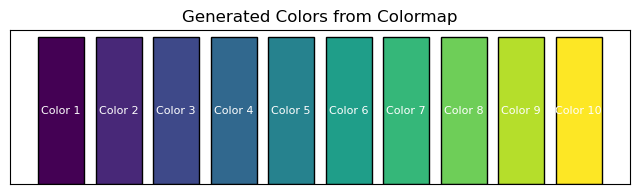

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a colormap and generate `n` colors
n = 10
colormap = plt.cm.viridis  # Choose your colormap
colors = [colormap(i / (n - 1)) for i in range(n)]  # Generate `n` evenly spaced colors

for color in colors:
    print(color)
    # print(color, color_to_rgb(color))
    

# Visualize the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors):
    plt.bar(i, 1, color=color, edgecolor='black')
    plt.text(i, 0.5, f"Color {i+1}", ha='center', va='center', color='white', fontsize=8)
plt.xticks([])
plt.yticks([])
plt.title("Generated Colors from Colormap")
plt.show()


In [17]:
# Define a custom list of colors
n = 5
colors = plt.cm.tab20(np.linspace(0, 1, n))  # Use 'tab20' colormap to generate 5 colors


print(colors[:, :3]*255)

[[ 31. 119. 180.]
 [152. 223. 138.]
 [140.  86.  75.]
 [199. 199. 199.]
 [158. 218. 229.]]
